In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

global_temp_country = pd.read_csv('input/GlobalLandTemperaturesByCountry.csv')

In [5]:
world_map = pd.read_csv('input/countries.csv')
c_df = pd.read_csv('output/country_temp.csv')

In [9]:
c_df

,country,code,percentage(%),url,avgTemperature(°C),minTemprature(°C),maxTemprature(°C),color
0,Afghanistan,AF,2.215657,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,14.045007,-4.553,28.533,Bright Blue
1,Albania,AL,2.215657,http://cichorieae.e-taxonomy.net/portal/cdm_da...,12.610646,-2.049,25.843,Bright Blue
2,Australia,AU,3.397341,https://en.wikipedia.org/wiki/Chicory,21.624697,12.529,29.861,Bright Blue
3,Azerbaijan,AZ,0.738552,https://www.bing.com/search?q=cichorium+intybu...,11.175936,-5.989,26.676,Bright Blue
4,Belgium,BE,1.477105,https://en.wikipedia.org/wiki/Chicory,9.483378,-6.079,22.837,Bright Blue
5,Bulgaria,BG,1.477105,https://www.bing.com/search?q=cichorium+intybu...,10.482968,-6.903,25.063,Bright Blue
6,Bosnia and Herzegovina,BA,2.215657,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,NaN,NaN,Bright Blue
7,Brazil,BR,0.295421,https://en.wikipedia.org/wiki/Chicory_root,24.699256,21.797,27.151,Bright Blue
8,Canada,CA,1.329394,https://www.bing.com/search?q=cichorium+intybu...,-5.216659,-28.736,14.796,Bright Blue
9,Chile,CL,0.738552,https://www.bing.com/search?q=cichorium+intybu...,9.383474,3.206,15.493,Bright Blue


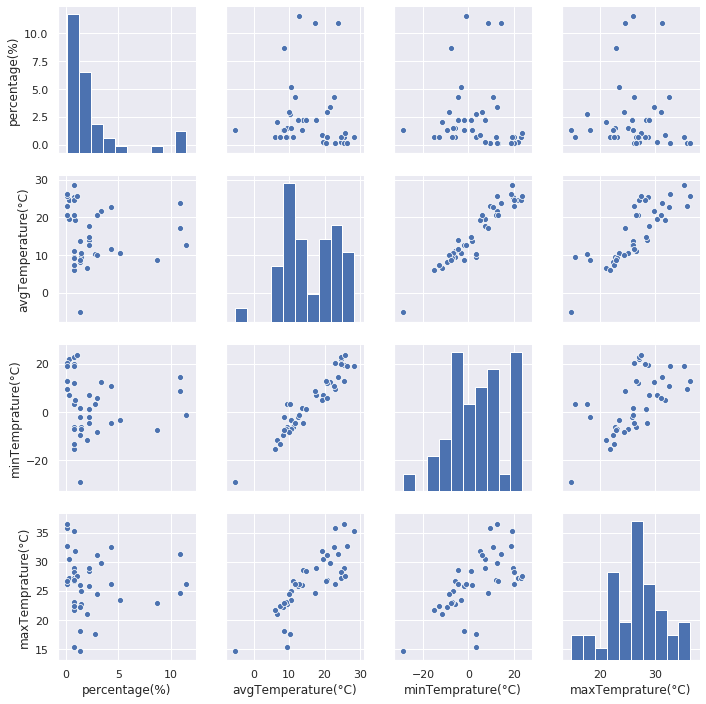

In [7]:
c2=c_df.drop(c_df.index[6])
sns.set()
cols = ['percentage(%)','avgTemperature(°C)','minTemprature(°C)','maxTemprature(°C)']
sns.pairplot(c2[cols], size = 2.5)
plt.show();

In [8]:
countries=np.unique(c_df['country'])
freq = []
for country in countries:
    freq.append(list(c_df[c_df['country'] ==country]['percentage(%)'])[0])
freq
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = freq,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'percentage(\%)')
            )
       ]

layout = dict(
    title = 'frequency of countries for Cichorium Intybus',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,150,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')


In [10]:
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = freq,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = 'percentage(%)'),
        #The following line is also needed to create Stream
        #stream = stream_id
            )
       ]

layout = dict(
    title = 'frequency of countries for Cichorium Intybus',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world_temp_map')
